<a href="https://colab.research.google.com/github/JAYANTH1774/2303A51774-ADM/blob/main/ADM%20ASS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
file_path = "/content/netflix_titles.csv"
data = pd.read_csv(file_path)

In [4]:
# Convert 'release_year' to numeric
data['release_year'] = pd.to_numeric(data['release_year'], errors='coerce')

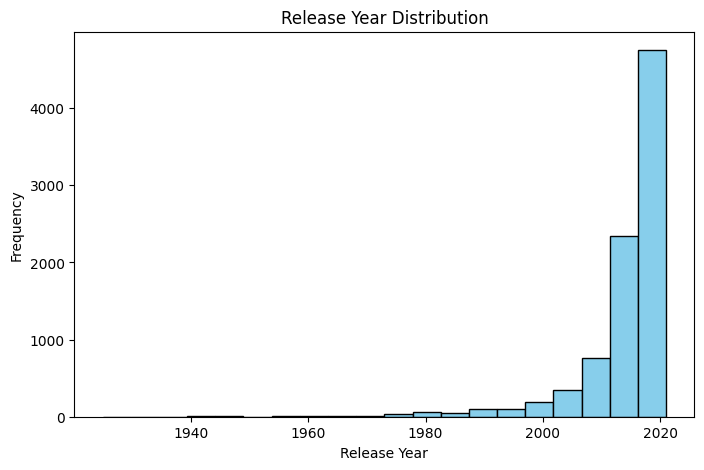

In [5]:
# Plot histogram for 'release_year'
plt.figure(figsize=(8, 5))
plt.hist(data['release_year'].dropna(), bins=20, edgecolor='black', color='skyblue')
plt.title('Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

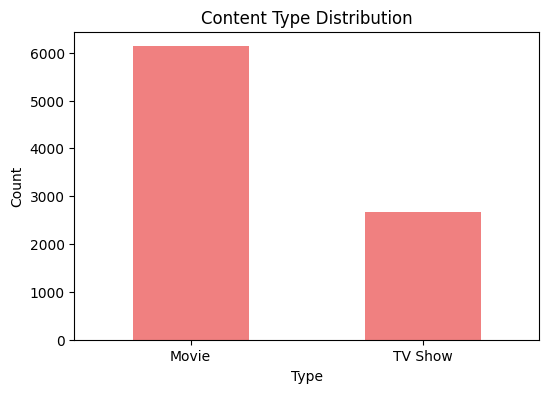

In [6]:
# Bar chart for 'type' (Movie vs TV Show)
plt.figure(figsize=(6, 4))
data['type'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Content Type Distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
# Extract numeric duration if it's in 'XX min' or 'XX Season(s)' format
data['duration_numeric'] = data['duration'].str.extract(r'(\d+)').astype(float)

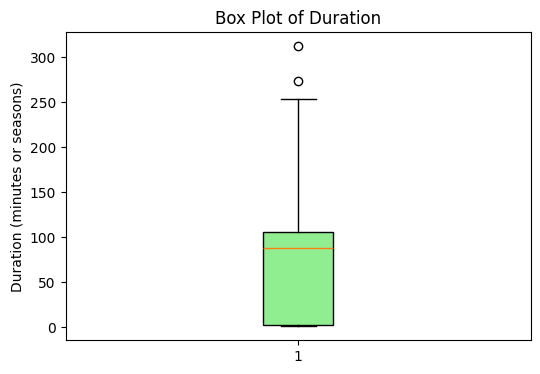

In [9]:
# Box plot for 'duration_numeric' if applicable
if data['duration_numeric'].notna().sum() > 0:
    plt.figure(figsize=(6, 4))
    plt.boxplot(data['duration_numeric'].dropna(), patch_artist=True,
                boxprops=dict(facecolor='lightgreen'))
    plt.title('Box Plot of Duration')
    plt.ylabel('Duration (minutes or seasons)')
    plt.show()

In [10]:
# Top 10 genres (from 'listed_in' column)
top_genres = data['listed_in'].str.split(', ').explode().value_counts().head(10)

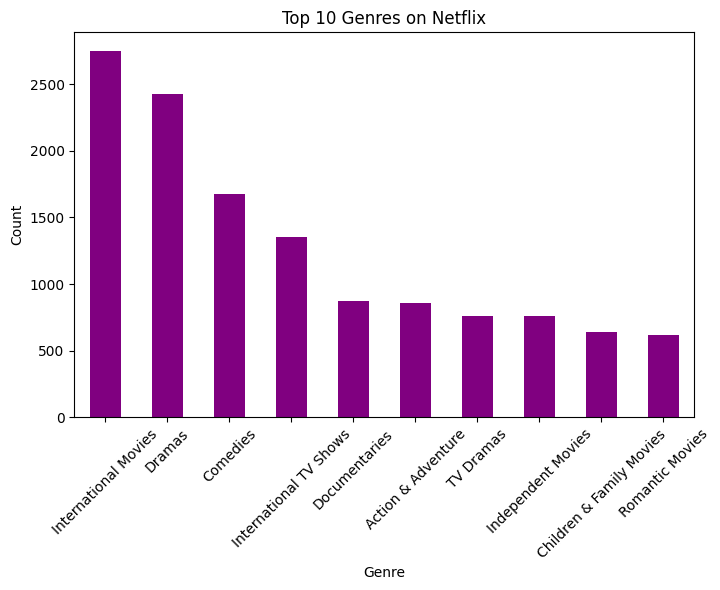

In [11]:
# Bar chart for top genres
plt.figure(figsize=(8, 5))
top_genres.plot(kind='bar', color='purple')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

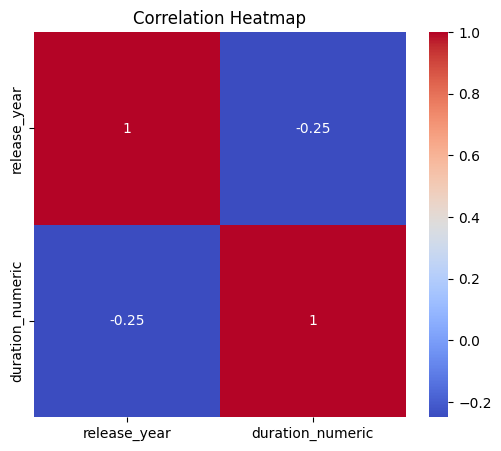

In [12]:
# Correlation Heatmap (if numerical columns exist)
numerical_cols = data.select_dtypes(include=['number'])
if not numerical_cols.empty:
    plt.figure(figsize=(6, 5))
    sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', cbar=True)
    plt.title('Correlation Heatmap')
    plt.show()